In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
from tensorflow.keras.models import load_model
from keras.metrics import MeanSquaredError
from spacepy import pycdf
from spacepy.time import Ticktock
import os
from spacepy import pycdf
from spacepy.time import Ticktock

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']	
plt.rcParams['axes.unicode_minus'] = False

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [ ]:
model = load_model('LSTM_148_model.h5', custom_objects={'mse': MeanSquaredError()})

In [3]:
combined_df=pd.read_hdf('combined_df_2018_test.h5', key='df')

In [4]:
dfdf=combined_df

In [5]:
time_steps=120
VX_time1 = [f'VX_{i}h' for i in range(1, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(1, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(1, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(1, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(1, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(1, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(1, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(1, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(1, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(1, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(1, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(1, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(1, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(1, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(1, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(1, time_steps + 1)]

In [6]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
X_time7 = combined_df[Kp_time7].values
X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time5,X_time6,X_time7,X_time8,X_time9,X_time10,X_time11,X_time12,X_time13,X_time14,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = [ 'I', 'MLT', 'L']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y=np.log10(combined_df['Flux'].values) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)

(225189, 120, 16)


In [7]:
import joblib
scaler_time = joblib.load('scaler_time.pkl')
scaler_non_time = joblib.load('scaler_non_time.pkl')
scaler_target = joblib.load('scaler_target.pkl')
num_samples = X_time.shape[0]
time_steps = 120  # 根据您的数据调整
num_features = 16
X_time_reshaped = X_time.reshape(-1, num_features)
X_time_scaled = scaler_time.transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
X_non_time = scaler_non_time.transform(X_non_time)
y = scaler_target.transform(y)

7038/7038 [==============================] - 17s 2ms/step


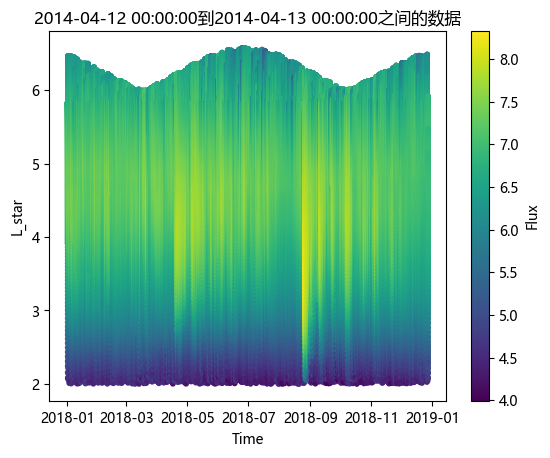

In [8]:
y_pred11 = model.predict([X_time, X_non_time])
y_pred11 = scaler_target.inverse_transform(y_pred11)

y_pred11 = 10**(y_pred11)


plt.scatter(dfdf['Time'], dfdf['L'], c=np.log10(y_pred11), cmap='viridis', s=10)
plt.colorbar(label='Flux')
plt.xlabel('Time')
plt.ylabel('L_star')
plt.title('2014-04-12 00:00:00到2014-04-13 00:00:00之间的数据')
plt.show()

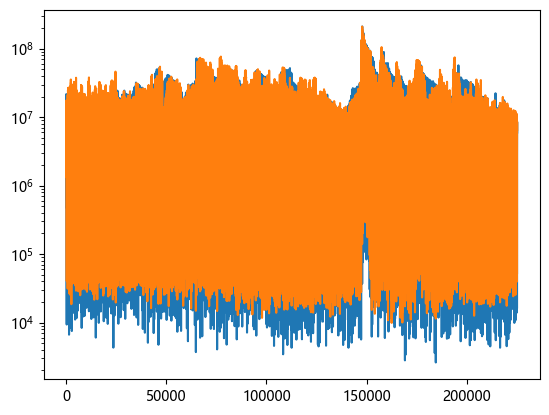

In [9]:
plt.plot(dfdf['Flux'])
plt.plot(y_pred11)
plt.yscale('log')


In [10]:
Dst=pd.read_csv('../空间天气参数/Dst.txt',sep='\s+',header=None)
Dst.columns=['year','day','hour','Dst']
Dst['datetime'] = pd.to_datetime(Dst['year'].astype(str) + Dst['day'].astype(str).str.zfill(3) + Dst['hour'].astype(str).str.zfill(2), format='%Y%j%H')
Dst=Dst.drop(['year','day','hour'],axis=1)
Dst = Dst.sort_values(by='datetime')

In [11]:
start_time = '2018-01-01 00:00:00'
end_time = '2019-01-01 00:00:00'

In [12]:
mask = (Dst['datetime'] >= start_time) & (Dst['datetime'] <= end_time)
Dst = Dst.loc[mask]


In [13]:
print(Dst)

        Dst            datetime
333120   -5 2018-01-01 00:00:00
333121   -7 2018-01-01 01:00:00
333122  -13 2018-01-01 02:00:00
333123  -10 2018-01-01 03:00:00
333124  -13 2018-01-01 04:00:00
...     ...                 ...
341876   -5 2018-12-31 20:00:00
341877   -5 2018-12-31 21:00:00
341878   -3 2018-12-31 22:00:00
341879   -2 2018-12-31 23:00:00
341880   -3 2019-01-01 00:00:00

[8761 rows x 2 columns]


0.7996611265675186
(225189,)


C:\Users\root\AppData\Local\Temp\ipykernel_28304\2237004189.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to leave space for colorbar


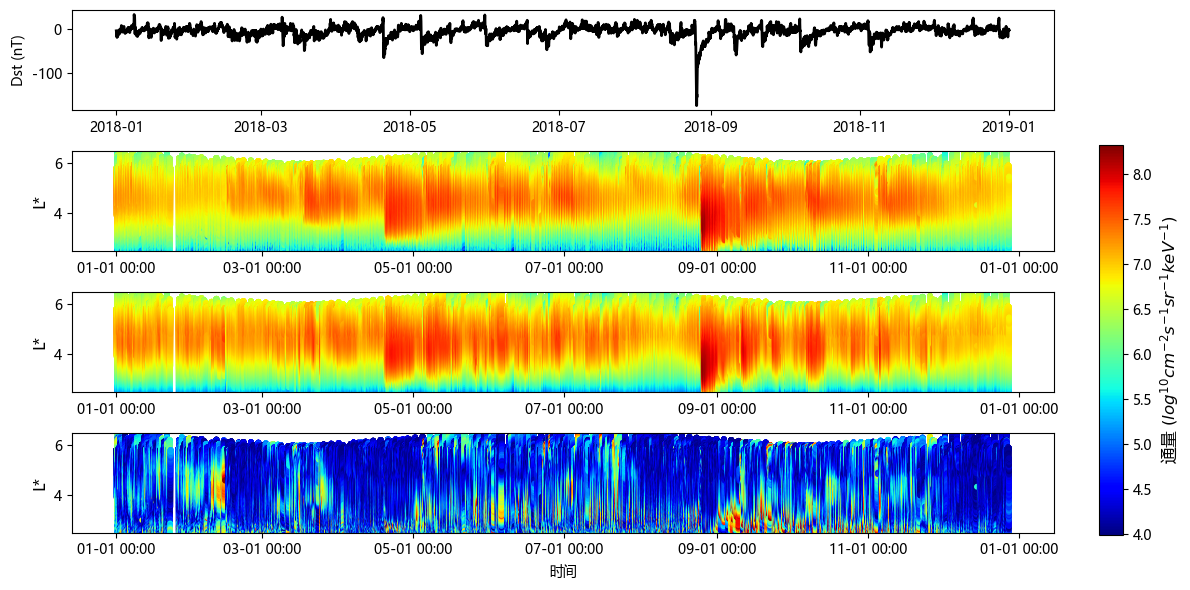

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
import numpy as np

# Define custom colormap
cmap1 = LinearSegmentedColormap.from_list("custom1", ["#f8f9fa", "#e9ecef", "#000000"])
max=np.log10(y_pred11).max()
min=np.log10(y_pred11).min()
cmap1 = 'jet'
# Create (3, 1) subplot layout without shared axes
fig, axes = plt.subplots(4, 1, figsize=(12, 6))

# Plot each subplot
time_nums = mdates.date2num(dfdf['Time'])

axes[0].plot(Dst['datetime'], Dst['Dst'], linestyle='-', c='black', linewidth=2)
axes[0].set_ylabel('Dst (nT)')



sc = axes[1].scatter(dfdf['Time'], dfdf['L'], c=np.log10(dfdf['Flux'] ), cmap=cmap1, s=10, vmin=min, vmax=max)
axes[1].set_ylabel('L*', fontsize=12)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
axes[1].set_ylim(2.5,6.5)

axes[2].scatter(dfdf['Time'], dfdf['L'], c=np.log10(y_pred11), cmap=cmap1, s=10, vmin=min, vmax=max)
axes[2].set_ylabel('L*', fontsize=12)
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
axes[2].set_ylim(2.5,6.5)

# print(np.log10(y_pred11).shape)
# print(np.log10(dfdf['Flux']+1699/5 ).shape)

ccc=abs(np.log10(y_pred11).reshape(-1)-np.log10(dfdf['Flux']))
print(ccc.max())
print(ccc.shape)


axes[3].scatter(dfdf['Time'], dfdf['L'], c=ccc, cmap=cmap1, s=10)
axes[3].set_ylabel('L*', fontsize=12)
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
axes[3].set_ylim(2.5,6.5)

axes[-1].set_xlabel('时间')

# Add shared colorbar (place it further to the right)
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.65])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('通量 ${(log^{10} cm^{-2}s^{-1}sr^{-1}keV^{-1})}$' , fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to leave space for colorbar
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(np.log10(y_pred11), np.log10(dfdf['Flux'])))
# r2 = r2_score( np.log10(dfdf['Flux']),np.log10(y_pred11))
r2 = r2_score( np.log10(y_pred11),np.log10(dfdf['Flux']))
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')

测试集上的 RMSE: 0.20184478351155172 测试集上的 R2: 0.8786027648125296
